# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549328633.62


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 10
max_edges = 40000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 40000 edges out of 229338 available (17.44% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,7449.000000,7449,7449,7448,7376,7389,0.0,580,7172,7086,7086,5305,2608,886,150,11,0.0,0.0,0.0,7392,7392,7388,7449.0,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7449.000000,7.449000e+03,7.449000e+03,7449.000000,7449.000000
unique,NaN,7280,7449,5056,10,610,NaN,452,1,1,28,213,393,235,59,5,NaN,NaN,NaN,7392,7392,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8580332990/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,1 de janeiro de 2014,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Neurociência,NaN,NaN,NaN,8525431494,978-8582600481,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,1,82,6281,469,NaN,11,7172,7086,1299,801,146,67,15,3,NaN,NaN,NaN,1,1,6589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4438.479393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,75.047837,33912.156406,359.112039,15.454031,4.449179,15.309942,22.291848,2.103836,430.312192,2.116023e+09,3.045638e-03,9.097463,0.001197
std,2674.799842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,154.101678,47729.101613,253.681344,35.370909,0.547457,2.543170,2.549361,1.220995,202.125115,1.239177e+09,1.106904e-02,21.311759,0.003868
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.900000,3.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.200000,4.500000,2.291770e+05,2.823264e-09,1.000000,0.000000
25%,2134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.620000,7145.000000,200.000000,2.000000,4.400000,13.700000,20.800000,1.400000,281.000000,1.027567e+09,2.078612e-05,1.000000,0.000000
50%,4353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.420000,20326.000000,304.000000,10.000000,4.451743,15.400000,22.600000,1.800000,431.097804,2.092761e+09,1.576019e-04,3.000000,0.000229
75%,6687.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,64.000000,41003.000000,444.000000,15.365221,4.800000,16.000000,23.200000,2.600000,540.000000,3.178862e+09,1.135351e-03,7.000000,0.000830


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.000100,19,0.001607
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.000199,62,0.001628
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,15.365221,4.451743,14.4,20.8,0.8,200.0,1260550007,0.000148,59,0.003992
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.000049,18,0.001411
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.000291,88,0.003310
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.000276,43,0.002913
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,15.365221,4.451743,13.7,21.5,0.8,159.0,744636978,0.000032,9,0.000878
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.000207,10,0.001915
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,15.365221,4.451743,13.6,20.3,2.3,522.0,1246026773,0.000077,23,0.001101
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price


Test percentage:  0.200026849242
Train features shape:  (5959, 6618)
Train target shape:  (5959,)
Test features shape:  (1490, 6618)
Test target shape:  (1490,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 75.3884426917268
Median parice; R$ 39.4


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.35101602769934487
RF relative abs std:  0.015035258284634333
Baseline (average) relative mean:  1.4181315017515705
Baseline (average) relative std:  0.06851723282800594
Baseline (median) relative mean:  0.5926582129572131
Baseline (median) relative std:  0.02515909464756887
=== Absolute
RF abs mean:  26.099372457278214
RF abs std:  3.0219115485873087
Baseline (average) mean:  63.10559076839284
Baseline (average) std:  5.790132214346815
Baseline (median) mean:  49.532258764311095
Baseline (median) std:  6.113273156780974


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,language_Inglês,21.839469,1.247106,0.057103
1,pages,20.665318,2.208676,0.106878
2,category2_Inglês e Outras Línguas,7.290372,1.523926,0.209033
3,width,6.842068,1.689167,0.246880
4,height,4.978310,0.592555,0.119027
5,publisher_Cengage Learning,4.928900,2.706819,0.549173
6,coverType_Capa dura,4.455168,2.030974,0.455869
7,coverType_Capa comum,4.002995,1.821884,0.455130
8,eigenvector_centrality,3.105763,0.771766,0.248495
9,ranking,2.444355,0.469384,0.192028


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [596, 596, 596, 596, 596, 596, 596, 596, 596, 595]
X shape:  (5959, 6618)
y shape:  (5959,)


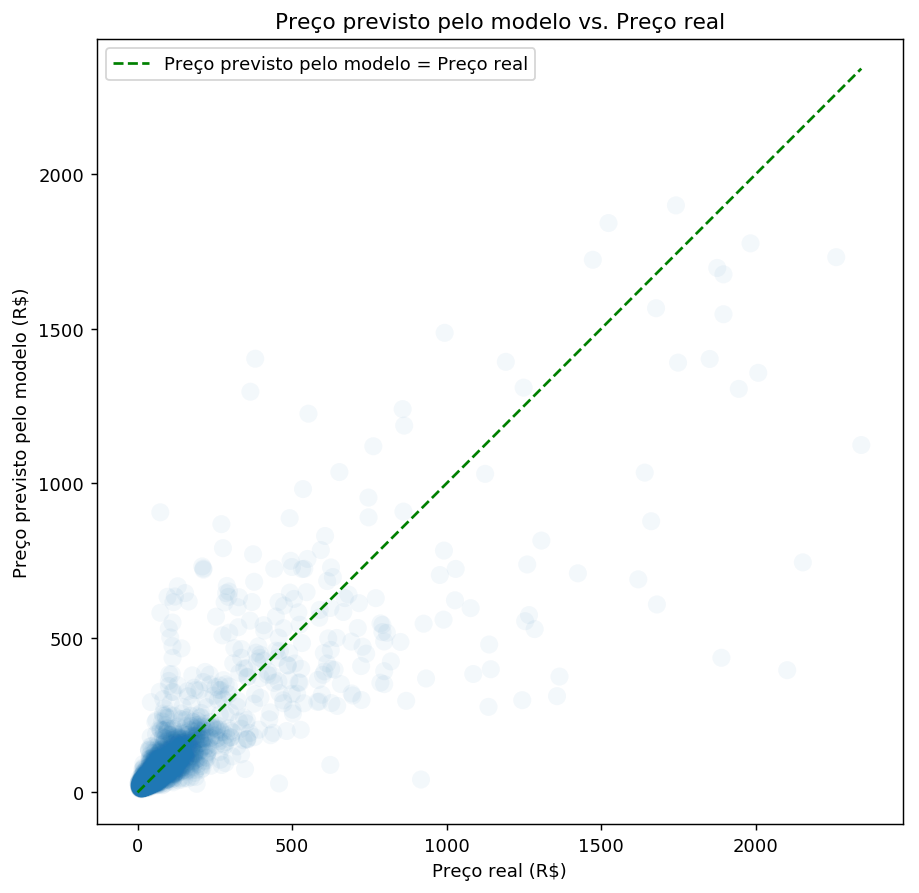

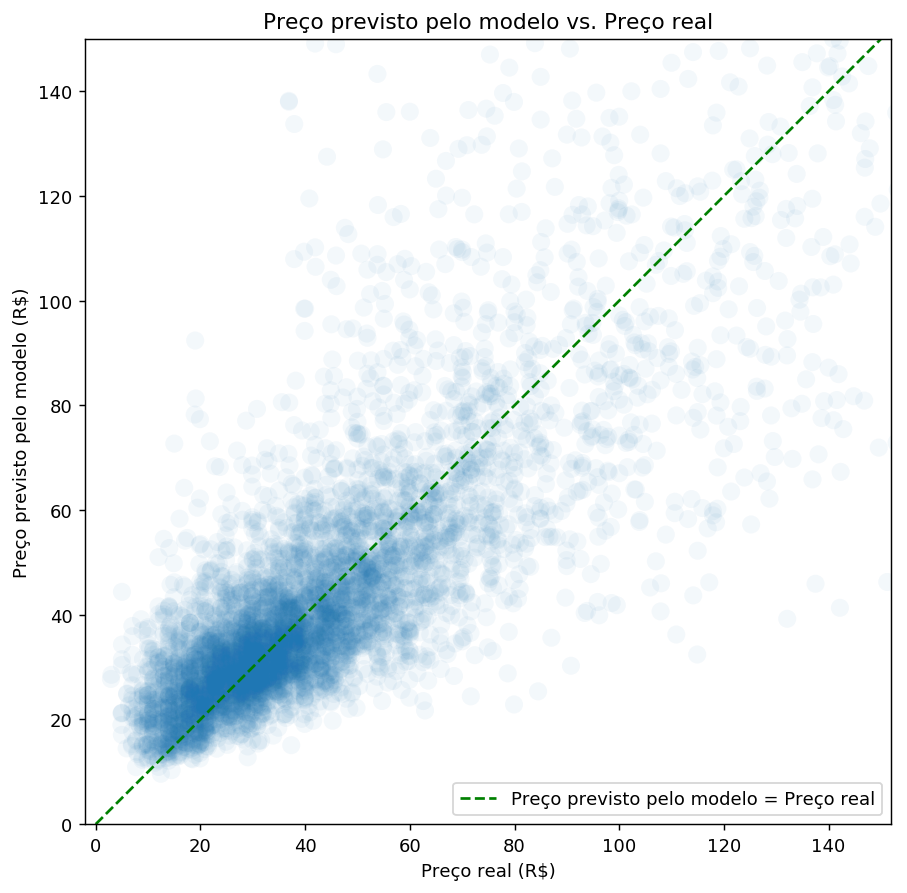

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 26.1)
('Std prediction error: R$', 80.71)
('Mean absolute error using average: R$', 63.11)
('Std prediction error using average: R$', 143.57)
('Mean absolute error using median: R$', 49.53)
('Std prediction error using median: R$', 153.09)
== Relative
('Mean relative absolute prediction error: ', 0.35)
('Std relative prediction error: ', 0.53)
('Mean relative absolute error using average: ', 1.42)
('Std relative prediction error using average: ', 1.57)
('Mean absolute error using median: R$', 0.59)
('Std prediction error using median: R$', 0.69)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.144179e+09,"[1144179495.0, 6.0, 1.57790484913e-05, 0.00055...",1706.238,2026.151557,2062.14,0.981252,0.964127,0.811899,395.302,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,35000.018287,432.000000,15.365221,4.451743,16.800000,24.100000,3.300000,921.000000,0.000016,6,0.000558
9.158984e+07,"[91589843.0, 13.0, 8.02978439104e-05, 0.000341...",1453.409,1813.371557,1849.36,0.979140,0.960086,0.769504,435.351,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,15.365221,4.451743,21.000000,26.000000,3.200000,431.097804,0.000080,13,0.000342
7.945218e+08,"[794521798.0, 2.0, 4.73120631369e-06, 2.045375...",1408.186,2076.781557,2112.77,0.981693,0.964971,0.654310,743.984,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,35000.018287,768.000000,15.365221,4.451743,18.500000,23.900000,3.300000,431.097804,0.000005,2,0.000020
1.731114e+09,"[1731113829.0, 13.0, 0.000106947387388, 0.0006...",1217.580,2265.811557,2301.80,0.983171,0.967799,0.520067,1123.620,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,35000.018287,688.000000,15.365221,4.451743,20.300000,25.400000,3.200000,431.097804,0.000107,13,0.000655
1.859584e+09,"[1859584463.0, 2.0, 1.69922779635e-05, 4.68453...",1072.252,1604.701557,1640.69,0.976549,0.955128,0.638211,607.838,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,35000.018287,696.000000,15.365221,4.451743,19.000000,23.400000,3.300000,431.097804,0.000017,2,0.000047
1.993779e+09,"[1993779221.0, 25.0, 0.000125039055081, 0.0004...",1045.717,1281.611557,1317.60,0.970965,0.944445,0.770609,311.283,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,35000.018287,362.131261,15.365221,4.451743,15.345173,22.321928,2.115687,431.097804,0.000125,25,0.000470
3.072742e+09,"[3072742182.0, 1.0, 1.84367063359e-06, 0.0, 15...",1022.076,305.321557,341.31,0.896509,0.801979,2.684658,1402.786,380.71,2050,The Princeton Companion to Mathematics,https://www.amazon.com.br/dp/0691118809/,"Timothy Gowers (Editor),",Capa dura,Princeton University Press,NaN,28 de setembro de 2008,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0691118809,978-0691118802,Inglês,1,380.71,15803.000000,1034.000000,15.365221,4.451743,21.600000,26.700000,6.400000,

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.644459e+09,"[2644458574.0, 16.0, 0.000174036925274, 0.0003...",832.303,1.788443,34.20,0.464674,0.024299,11.308465,905.903,73.60,2169,100 Instructive Calculus-Based Physics Example...,https://www.amazon.com.br/dp/1941691137/,Chris McMullen (Autor),NaN,Zishka Publishing,NaN,17 de maio de 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941691137,978-1941691137,Inglês,1,73.60,35000.018287,362.131261,15.365221,4.451743,21.6,27.9,2.3,980.000000,0.000174,16,0.000303
3.020829e+09,"[3020829397.0, 1.0, 2.07239949411e-05, 0.0, 14...",24.836,72.488443,36.50,12.586207,24.996015,8.564138,27.736,2.90,5084,Elevador 16,https://www.amazon.com.br/dp/8562409456/,Rodrigo De Oliveira (Autor),Capa comum,Faro,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8562409456,978-8562409455,Português,1,2.90,14037.000000,60.000000,48.000000,4.500000,15.6,22.6,0.6,141.000000,0.000021,1,0.000000
2.272729e+08,"[227272911.0, 2.0, 0.000366732262525, 0.000325...",25.540,72.398443,36.41,12.177258,24.213526,8.541806,28.530,2.99,5170,Caçadores de Obras-Primas,https://www.amazon.com.br/dp/8532526144/,Robert M. Edsel (Autor),Capa comum,Rocco,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532526144,978-8532526144,Português,1,2.99,1451.000000,368.000000,9.000000,4.200000,15.8,22.8,2.0,558.000000,0.000367,2,0.000326
4.254723e+09,"[4254722701.0, 1.0, 3.14517644895e-05, 0.0, 22...",39.374,70.388443,34.40,6.880000,14.077689,7.874800,44.374,5.00,8487,Lacan com Derrida,https://www.amazon.com.br/dp/8520005926/,Rene Major (Autor),Capa comum,Civilização Brasileira,NaN,16 de outubro de 2002,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520005926,978-8520005927,Português,1,5.00,22501.000000,240.000000,15.365221,4.451743,13.4,20.8,1.6,340.000000,0.000031,1,0.000000
2.500409e+09,"[2500408971.0, 1.0, 1.05657607206e-05, 0.0, 19...",507.034,1.548443,34.44,0.466414,0.020970,6.866658,580.874,73.84,4513,"Tools of Titans: The Tactics, Routines, and Ha...",https://www.amazon.com.br/dp/1328683788/,"Timothy Ferriss (Autor),",Capa dura,Houghton Mifflin Harcourt,NaN,6 de dezembro de 2016,Livros,Livros,Inglês e Outras Línguas,Autoajuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328683788,978-1328683786,Inglês,1,73.84,19820.000000,736.000000,8.000000,4.400000,17.8,22.9,0.2,431.097804,0.000011,1,0.000000
1.790101e+09,"[1790101457.0, 2.0, 0.00208566516159, 0.000147...",29.306,70.388443,34.40,6.880000,14.077689,5.861200,34.306,5.00,3579,Baudolino,https://www.amazon.com.br/dp/8577990028/,Umberto Eco (Autor),Capa comum,Best Seller,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577990028,978-8577990023,Português,1,5.00,35903.000000,602.000000,15.000000,4.300000,11.8,17.8,2.2,458.000000,0.002086,2,0.000147
1.340598e+09,"[1340598001.0, 2.0, 0.00241979922631, 6.564850...",248.872,32.338443,3.65,0.084785,0.751183,5.780999,291.922,43.05,8734,Shakespeare Box Set,https://www.amazon.com.br/dp/0762459433/,William Shakespeare (Autor),Capa dura,Running Press Miniature Editions,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Literatura e Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0762459433,978-0762459438,Inglês,1,43.05,43892.000000,680.000000,8.000000,3.700000,7.3,8.9,7.3,272.000000,0.002420,2,0.000066
1.142250e+08,"[114225047.0, 1.0, 9.06337112934e-06, 0.0, 526...",535.541,21.741557,57.73,0.594358,0.223840,5.513652,632.671,97.13,2078,GRE Prep 2019: Practice Tests + Proven Strateg...,https:

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.453662e+09,"[1453661728.0, 2.0, 0.000183545426469, 0.00018...",0.001,45.498443,9.51,0.318167,1.522196,0.000033,29.889,29.89,8299,A Banalização da Injustiça Social,https://www.amazon.com.br/dp/8522502668/,Christophe Dejours (Autor),Capa comum,FGV,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Ciências Sociais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8522502668,978-8522502660,Português,1,29.89,30187.0,160.0,15.365221,4.451743,15.4,22.8,0.8,259.000000,1.835454e-04,2,1.869644e-04
1.575380e+09,"[1575380207.0, 211.0, 0.160329643876, 0.007996...",0.004,43.088443,7.10,0.219814,1.334008,0.000124,32.296,32.30,537,Gente Pobre,https://www.amazon.com.br/dp/8573264330/,Fiódor Dostoiévski (Autor),Capa comum,Editora 34,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Clássica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8573264330,978-8573264333,Português,1,32.30,5075.0,192.0,27.000000,4.400000,13.6,20.8,1.2,259.000000,1.603296e-01,211,7.996715e-03
3.968539e+09,"[3968539070.0, 1.0, 0.000515596040645, 0.0, 10...",0.005,54.988443,19.00,0.931373,2.695512,0.000245,20.405,20.40,4082,A Menina Sem Palavra,https://www.amazon.com.br/dp/8565771067/,Mia Couto (Autor),Capa comum,Boa Companhia,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565771067,978-8565771061,Português,1,20.40,10356.0,160.0,10.000000,4.800000,13.8,21.2,1.0,358.000000,5.155960e-04,1,0.000000e+00
2.968784e+09,"[2968784427.0, 6.0, 0.00165139488725, 0.001424...",0.008,36.488443,0.50,0.012853,0.938006,0.000206,38.892,38.90,3734,História da Educação na Antiguidade Cristã,https://www.amazon.com.br/dp/8594090048/,Ruy Afonso da Costa Nunes (Autor),Capa comum,Kírion,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",Escolas e Ensino,Teoria da Educação,História,NaN,NaN,NaN,NaN,NaN,8594090048,978-8594090041,Português,1,38.90,5126.0,308.0,1.000000,5.000000,15.6,22.8,1.8,499.000000,1.651395e-03,6,1.424440e-03
1.016323e+09,"[1016323113.0, 1.0, 5.87100420087e-06, 0.0, 69...",0.009,52.998443,17.01,0.759714,2.367059,0.000402,22.399,22.39,8200,Sobre as Maneiras Científicas de Tratar o Dire...,https://www.amazon.com.br/dp/8515033453/,G. W. F. Hegel (Autor),Capa comum,Loyola,NaN,NaN,Livros,Livros,Religião e Espiritualidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8515033453,978-8515033454,Português,1,22.39,69130.0,136.0,1.000000,1.000000,12.2,18.8,0.8,159.000000,5.871004e-06,1,0.000000e+00
3.493112e+09,"[3493112068.0, 3.0, 2.14634876674e-05, 8.89696...",0.016,37.488443,1.50,0.039578,0.989141,0.000422,37.884,37.90,1345,O Homem que Calculava,https://www.amazon.com.br/dp/8501401900/,Malba Tahan (Autor),Capa dura,Record,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501401900,978-8501401908,Português,1,37.90,16059.0,288.0,63.000000,4.500000,16.0,23.4,2.4,717.000000,2.146349e-05,3,8.896960e-05
2.402852e+08,"[240285171.0, 4.0, 7.39222444951e-05, 0.000612...",0.017,47.488443,11.50,0.412186,1.702095,0.000609,27.917,27.90,7979,Sociologia das Religiões,https://www.amazon.com.br/dp/8527411458/,Max Weber (Autor),Capa comum,Ícone,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Político,NaN,NaN,NaN,NaN,NaN,NaN,8527411458,978-8527411455,Português,1,27.90,10651.0,112.0,15.365221,4.451743,15.2,22.6,0.8,200.000000,7.392224e-05,4,6.125446e-04
2.797215e+09,"[2797215026.0, 2.0, 0.00179805553844, 4.685957...",0.019,32.408443,3.58,0.083295,0.754035,0.000442,42.961,42.98,4271,Mestre das Cha

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.453662e+09,"[1453661728.0, 2.0, 0.000183545426469, 0.00018...",0.001,45.498443,9.51,0.318167,1.522196,0.000033,29.889,29.89,8299,A Banalização da Injustiça Social,https://www.amazon.com.br/dp/8522502668/,Christophe Dejours (Autor),Capa comum,FGV,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Ciências Sociais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8522502668,978-8522502660,Português,1,29.89,30187.0,160.0,15.365221,4.451743,15.4,22.8,0.8,259.000000,1.835454e-04,2,1.869644e-04
1.575380e+09,"[1575380207.0, 211.0, 0.160329643876, 0.007996...",0.004,43.088443,7.10,0.219814,1.334008,0.000124,32.296,32.30,537,Gente Pobre,https://www.amazon.com.br/dp/8573264330/,Fiódor Dostoiévski (Autor),Capa comum,Editora 34,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Clássica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8573264330,978-8573264333,Português,1,32.30,5075.0,192.0,27.000000,4.400000,13.6,20.8,1.2,259.000000,1.603296e-01,211,7.996715e-03
3.968539e+09,"[3968539070.0, 1.0, 0.000515596040645, 0.0, 10...",0.005,54.988443,19.00,0.931373,2.695512,0.000245,20.405,20.40,4082,A Menina Sem Palavra,https://www.amazon.com.br/dp/8565771067/,Mia Couto (Autor),Capa comum,Boa Companhia,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565771067,978-8565771061,Português,1,20.40,10356.0,160.0,10.000000,4.800000,13.8,21.2,1.0,358.000000,5.155960e-04,1,0.000000e+00
2.968784e+09,"[2968784427.0, 6.0, 0.00165139488725, 0.001424...",0.008,36.488443,0.50,0.012853,0.938006,0.000206,38.892,38.90,3734,História da Educação na Antiguidade Cristã,https://www.amazon.com.br/dp/8594090048/,Ruy Afonso da Costa Nunes (Autor),Capa comum,Kírion,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",Escolas e Ensino,Teoria da Educação,História,NaN,NaN,NaN,NaN,NaN,8594090048,978-8594090041,Português,1,38.90,5126.0,308.0,1.000000,5.000000,15.6,22.8,1.8,499.000000,1.651395e-03,6,1.424440e-03
1.016323e+09,"[1016323113.0, 1.0, 5.87100420087e-06, 0.0, 69...",0.009,52.998443,17.01,0.759714,2.367059,0.000402,22.399,22.39,8200,Sobre as Maneiras Científicas de Tratar o Dire...,https://www.amazon.com.br/dp/8515033453/,G. W. F. Hegel (Autor),Capa comum,Loyola,NaN,NaN,Livros,Livros,Religião e Espiritualidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8515033453,978-8515033454,Português,1,22.39,69130.0,136.0,1.000000,1.000000,12.2,18.8,0.8,159.000000,5.871004e-06,1,0.000000e+00
3.493112e+09,"[3493112068.0, 3.0, 2.14634876674e-05, 8.89696...",0.016,37.488443,1.50,0.039578,0.989141,0.000422,37.884,37.90,1345,O Homem que Calculava,https://www.amazon.com.br/dp/8501401900/,Malba Tahan (Autor),Capa dura,Record,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501401900,978-8501401908,Português,1,37.90,16059.0,288.0,63.000000,4.500000,16.0,23.4,2.4,717.000000,2.146349e-05,3,8.896960e-05
2.402852e+08,"[240285171.0, 4.0, 7.39222444951e-05, 0.000612...",0.017,47.488443,11.50,0.412186,1.702095,0.000609,27.917,27.90,7979,Sociologia das Religiões,https://www.amazon.com.br/dp/8527411458/,Max Weber (Autor),Capa comum,Ícone,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Político,NaN,NaN,NaN,NaN,NaN,NaN,8527411458,978-8527411455,Português,1,27.90,10651.0,112.0,15.365221,4.451743,15.2,22.6,0.8,200.000000,7.392224e-05,4,6.125446e-04
2.797215e+09,"[2797215026.0, 2.0, 0.00179805553844, 4.685957...",0.019,32.408443,3.58,0.083295,0.754035,0.000442,42.961,42.98,4271,Mestre das Cha

### Relative errors distribution

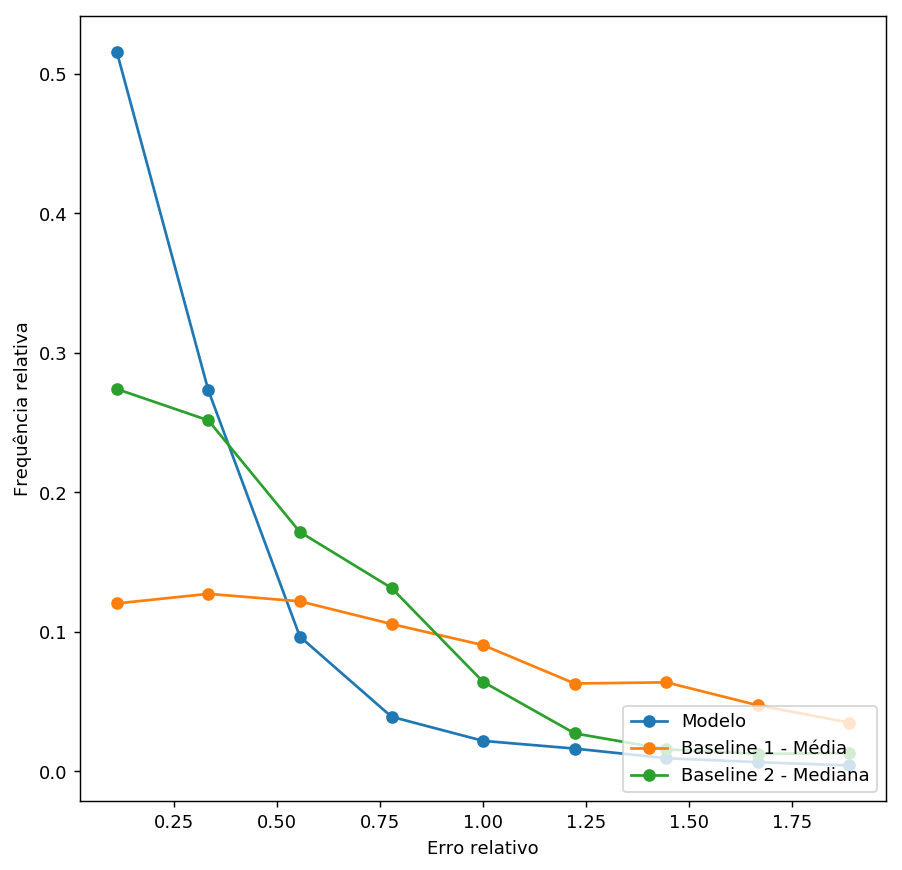

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

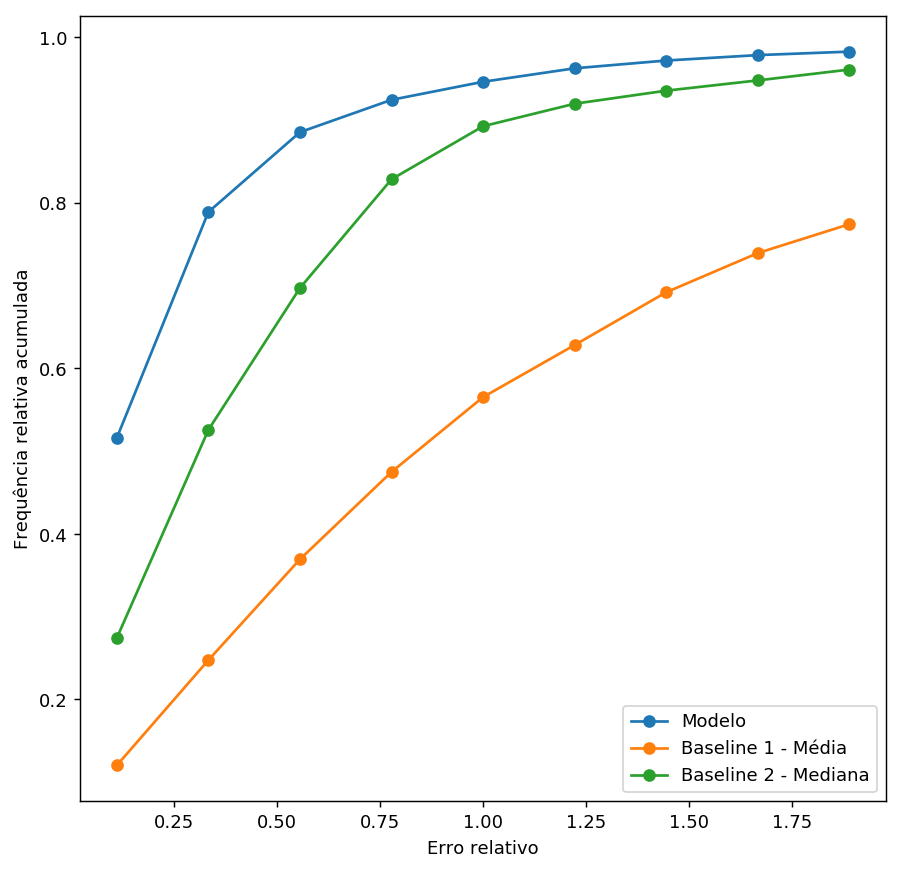

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,0.0,0.0,0.0,0.0,5959.0,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5959.000000,5.959000e+03,5959.000000,5959.000000
mean,26.100041,63.106897,49.533759,0.592661,1.418132,0.351015,72.862874,75.388443,4434.157745,NaN,NaN,NaN,NaN,1.0,75.388443,33359.859242,358.658894,15.238724,4.447224,15.301751,22.278625,2.102369,430.561446,3.096997e-03,9.250881,0.001198
std,80.718720,143.578849,153.099363,0.691954,1.572588,0.526195,131.329531,156.837606,2660.389911,NaN,NaN,NaN,NaN,0.0,156.837606,46596.284513,251.448977,33.578148,0.544443,2.539806,2.552529,1.232651,202.923332,1.110882e-02,21.703524,0.003872
min,0.001000,0.008443,0.000000,0.000000,0.000112,0.000033,9.617000,2.900000,1.000000,NaN,NaN,NaN,NaN,1.0,2.900000,3.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.200000,4.500000,2.823264e-09,1.000000,0.000000
25%,3.776000,27.388443,7.720000,0.197568,0.452146,0.099047,28.956000,26.620000,2135.500000,NaN,NaN,NaN,NaN,1.0,26.620000,7081.500000,200.000000,2.000000,4.400000,13.700000,20.800000,1.300000,281.000000,2.159328e-05,1.000000,0.000000
50%,8.585000,42.018443,15.900000,0.415604,0.935518,0.212168,38.836000,39.400000,4371.000000,NaN,NaN,NaN,NaN,1.0,39.400000,20077.000000,304.000000,10.000000,4.451743,15.400000,22.600000,1.800000,431.097804,1.600399e-04,3.000000,0.000223
75%,18.116000,54.233443,28.500000,0.748564,1.832023,0.393719,61.175500,63.755000,6632.500000,NaN,NaN,NaN,NaN,1.0,63.755000,40375.000000,440.000000,15.365221,4.800000,16.000000,23.200000,2.600000,540.000000,1.192138e-03,7.000000,0.000819
85%,28.730100,60.410443,54.183000,0.939735,2.591636,0.564467,90.321300,93.583000,7670.600000,NaN,NaN,NaN,NaN,1.0,93.583000,58228.800000,552.000000,15.365221,5.000000,17.000000,23.900000,3.000000,662.000000,3.332453e-03,13.300000,0.001540
90%,42.158800,65.488443,86.696000,1.190106,3.190575,0.730526,125.147400,126.096000,8152.400000,NaN,NaN,NaN,NaN,1.0,126.096000,73560.000000,640.000000,23.000000,5.000000,19.000000,25.320000,3.400000,726.000000,6.799100e-03,21.000000,0.002437
95%,88.326300,133.611557,169.600000,1.816297,4.388738,1.154033,206.121500,209.000000,8634.500000,NaN,NaN,NaN,NaN,1.0,209.000000,106733.200000,800.000000,47.000000,5.000000,20.800000,27.600000,4.200000,839.000000,1.691580e-02,40.000000,0.004988


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
206.631654978


<img src="files/image.png">